### Import Relevant Packages

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline
warnings.filterwarnings('ignore')

### Load Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

### Sneak peek

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Missing Values

In [5]:
dfs = [train_df, test_df]
for df in dfs:
    miss = df.isnull().sum().sort_values(ascending=False)
    percentage = round(df.isnull().sum()/df.isnull().count()*100, 2).sort_values(ascending=False)
    missing_data = pd.concat([miss, percentage], axis=1, keys=['Null', '%'])
    print(missing_data.head())

          Null      %
Cabin      687  77.10
Age        177  19.87
Embarked     2   0.22
Fare         0   0.00
Ticket       0   0.00
          Null      %
Cabin      327  78.23
Age         86  20.57
Fare         1   0.24
Embarked     0   0.00
Ticket       0   0.00


In [6]:
#We drop columns that have more than 75% missing values

train_df.dropna(thresh=len(train_df)*.75, axis = 1, inplace = True)
test_df.dropna(thresh=len(test_df)*.75, axis = 1, inplace = True)

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Univariate Analysis

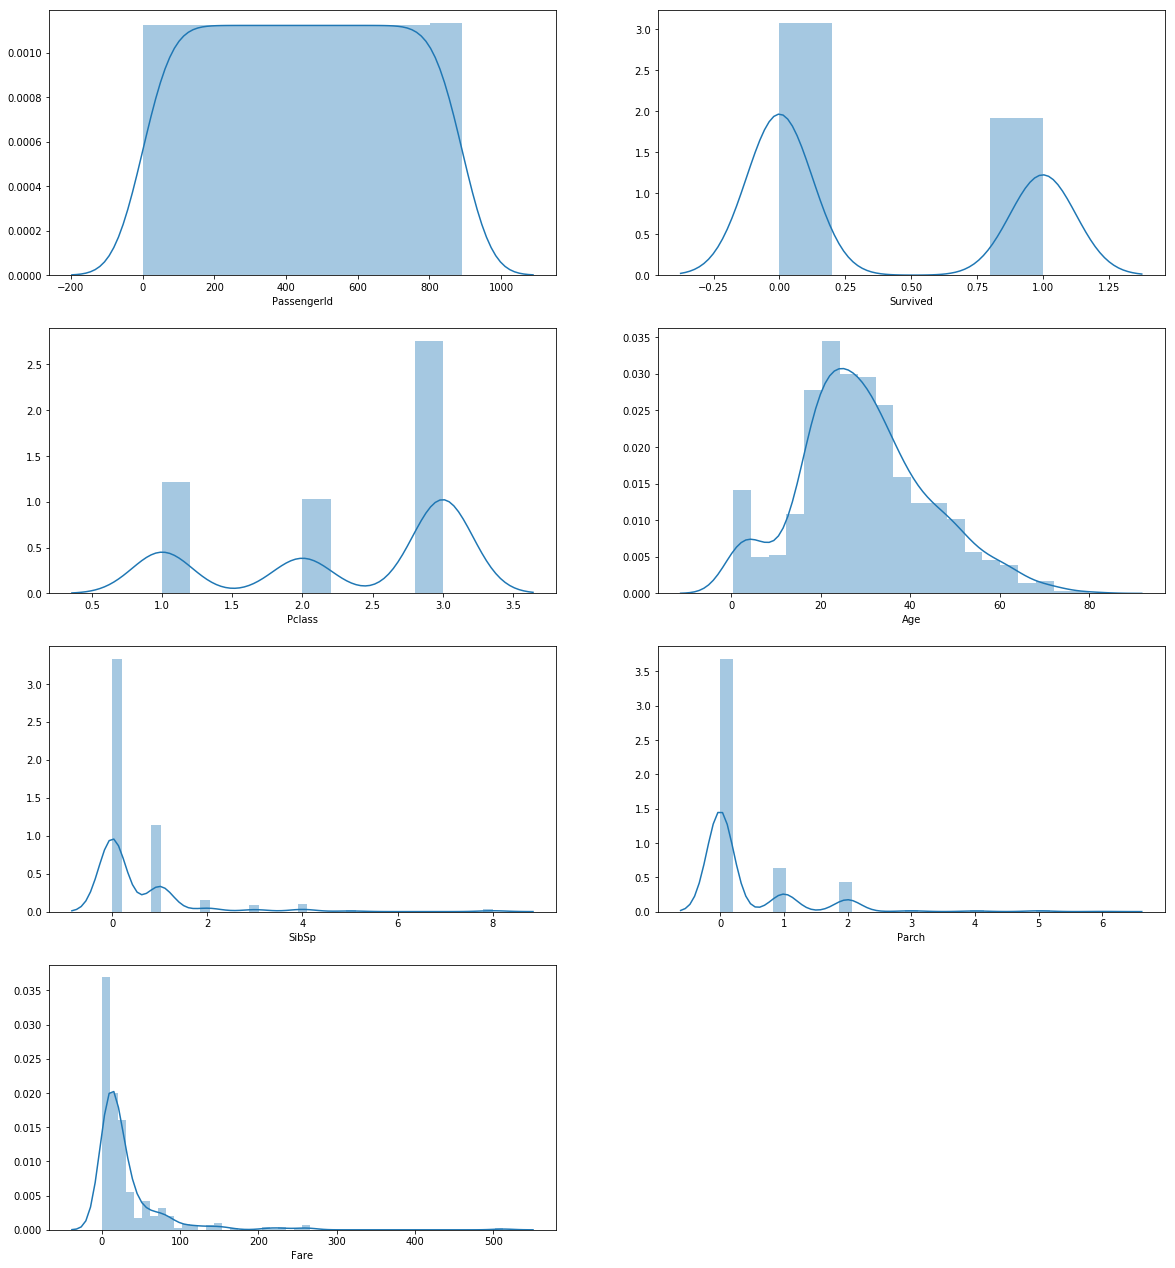

In [8]:
numeric_cols = train_df._get_numeric_data().columns
fig = plt.figure(figsize=(20, 40))
for i in range(len(numeric_cols)):
    plt.subplot(len(numeric_cols), 2, i+1)
    sns.distplot(train_df[numeric_cols[i]].dropna())

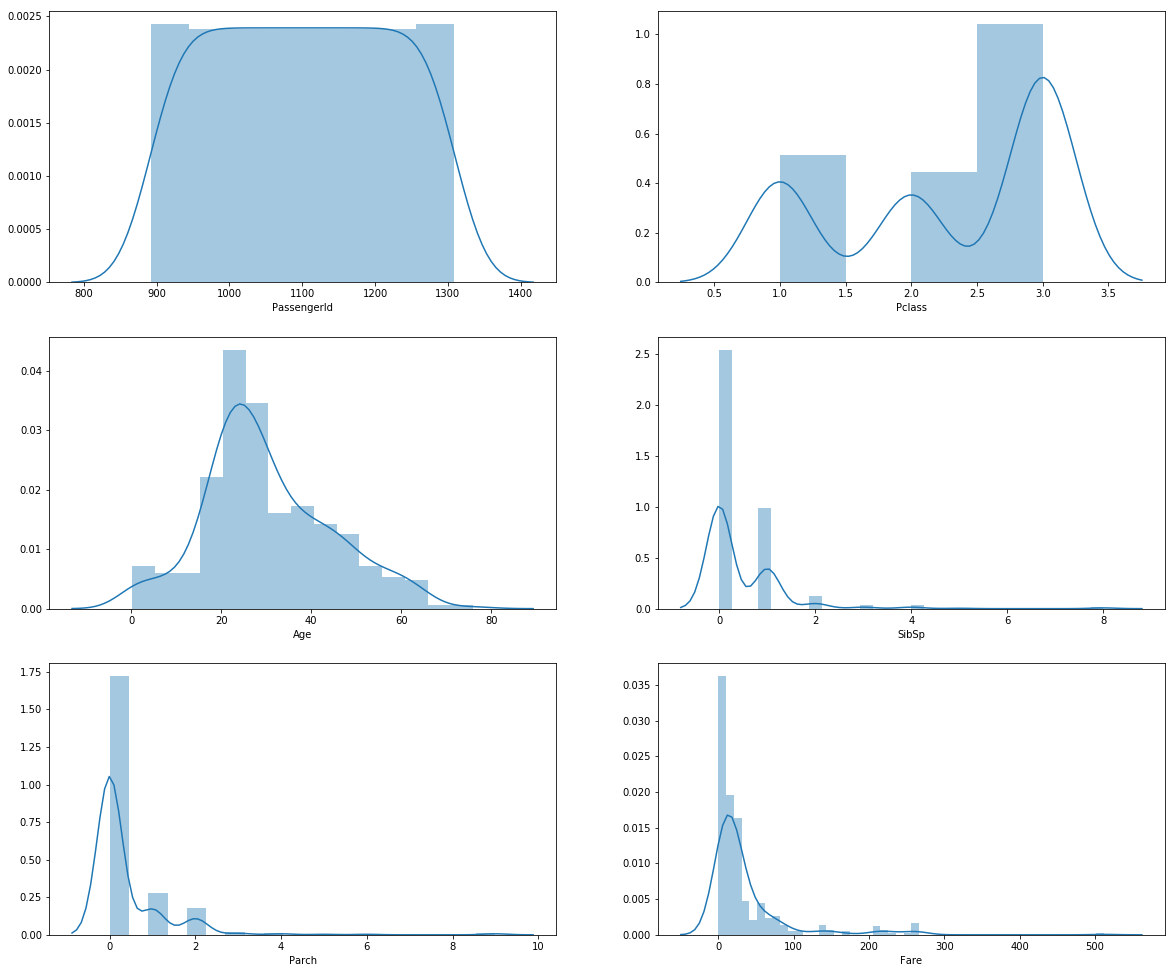

In [9]:
numeric_cols = test_df._get_numeric_data().columns
fig = plt.figure(figsize=(20, 35))
for i in range(len(numeric_cols)):
    plt.subplot(len(numeric_cols), 2, i+1)
    sns.distplot(test_df[numeric_cols[i]].dropna())

In [12]:
train_df['Age'].fillna(np.random.normal(train_df['Age'].mean(), train_df['Age'].std()), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
test_df['Age'].fillna(np.random.normal(test_df['Age'].mean(), test_df['Age'].std()), inplace=True)
test_df['Fare'].fillna(np.random.normal(test_df['Fare'].mean(), test_df['Fare'].std()), inplace=True)

In [13]:
genders = {'male': 0, 'female': 1}
mapping = {'S': 0, 'Q': 1, 'C': 2}

for df in dfs:
    df['Embarked'] = df['Embarked'].map(mapping)
    df['Sex'] = df['Sex'].map(genders)

In [15]:
for val in dfs:
    
    val['Age'] = val['Age'].astype(int)
    val.loc[val['Age'] <= 11, 'Age'] = 1
    val.loc[(val['Age'] > 11) & (val['Age'] <= 19), 'Age'] = 2
    val.loc[(val['Age'] > 19) & (val['Age'] <= 25), 'Age'] = 3
    val.loc[(val['Age'] > 25) & (val['Age'] <= 35), 'Age'] = 4
    val.loc[(val['Age'] > 35) & (val['Age'] <= 50), 'Age'] = 5
    val.loc[(val['Age'] > 50) & (val['Age'] <= 65), 'Age'] = 6
    val.loc[(val['Age'] > 65), 'Age'] = 7
    
    val.loc[val['Fare'] <= 7.91, 'Fare'] = 0
    val.loc[(val['Fare'] > 7.91) & (val['Fare'] <= 14.45), 'Fare'] = 1
    val.loc[(val['Fare'] > 14.45) & (val['Fare'] <= 31), 'Fare'] = 2
    val.loc[(val['Fare'] > 31) & (val['Fare'] <= 99), 'Fare'] = 3
    val.loc[(val['Fare'] > 99) & (val['Fare'] <= 250), 'Fare'] = 4
    val.loc[(val['Fare'] > 250), 'Fare'] = 5
    val['Fare'] = val['Fare'].astype(int)

### Multivariate

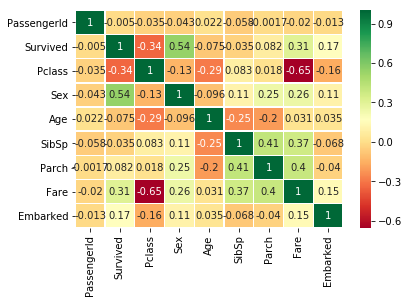

In [16]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.4)

### Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'],axis=1),train_df['Survived'], test_size=0.30,random_state=101)
reg = LogisticRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [18]:
classification_report(y_test,predictions)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       154
           1       0.79      0.65      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268



In [19]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 40,  74]], dtype=int64)

In [20]:
X_train, X_test, y_train= train_df.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1), test_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1), train_df['Survived']
reg = LogisticRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [21]:
test_df['Survived'] = predictions

In [22]:
test_df.to_csv('Predictions.csv')